# CW2:
Tasks: Datasets for various classifers: 1. Whole dataset for 10 fold cross validation;
                                        2. Training data (same as 10 fold cross validation) + Testing Data (11/11/20 test -Test datasets now provided)
                                        3. Move 4000 from Training to Test Dataset
                                        4. Move 9000 from Training to Test Dataset
                                        
Another question asked on vision is if we can used the feature reduced dataset for exploratory analyses in CW2

Approach below is to read attributes file and join it with labels - then convert them to nominal attributes - then randomise -- the end product is ready as (1.) for classifications

Datasets can be access through the following link (The Ten fold cross validation dataset is also the training dataset for the Test dataset):
https://heriotwatt-my.sharepoint.com/:f:/g/personal/rrp3_hw_ac_uk/EicOG3rlRCBBtIiT5nFYbV8Bch2eK_Ckk294pYD5oq9sOg?e=paluXr

In [51]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#read the attribute csvs file into respective dataframes
X = pd.read_csv ('x_train_gr_smpl.csv')

In [5]:
# read the class attribute file into Y datafram
Y = pd.read_csv('y_train_smpl.csv')
Y.columns = ['Class']

In [6]:
#join the two such that Y is the last column
XYraw = pd.concat([X,Y], axis=1)
#check the concatination
print(XYraw)

          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...  2295  2296   2297  2298  2299  2300   2301   2302   

In [7]:
#convert numberic to nominal 
XYraw[['Class']] = XYraw[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

In [8]:
XYraw.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,zero
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,zero
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,zero
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,zero
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,zero


In [9]:
#randomise 
XYraw_ran = XYraw.sample(frac=1).reset_index(drop=True)
print(XYraw_ran)

          0      1      2      3      4      5      6      7      8      9  \
0      54.0   42.0   51.0   61.0   88.0   96.0   85.0   70.0  101.0   96.0   
1      68.0   67.0   65.0   62.0   61.0   65.0   68.0   75.0   75.0   73.0   
2      41.0   50.0   58.0   66.0   66.0   64.0   45.0   52.0   50.0   48.0   
3      59.0   59.0   60.0   62.0   69.0   68.0   67.0   63.0   64.0   68.0   
4     220.0  222.0  218.0  220.0  220.0  219.0  220.0  220.0  220.0  220.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   81.0   83.0   82.0   83.0   86.0   85.0   86.0   88.0   93.0   94.0   
9686   23.0   23.0   22.0   19.0   16.0   29.0   86.0  148.0  185.0  141.0   
9687   91.0   91.0   69.0   93.0   79.0   76.0   63.0   52.0   49.0   45.0   
9688   50.0   51.0   53.0   52.0   50.0   46.0   46.0   46.0   47.0   51.0   
9689  194.0  193.0  193.0  193.0  194.0  194.0  195.0  195.0  196.0  196.0   

      ...   2295   2296   2297   2298   2299   2300   2301   23

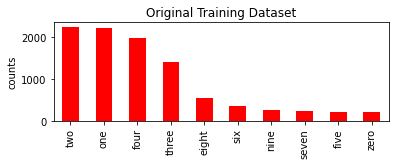

In [30]:
plt.subplot(212)
plt.title('Original Training Dataset')
plt.ylabel('counts')
XYraw_ran['Class'].value_counts().plot(kind="bar", color ="red")

In [25]:
#generate this as a csv to directly feed into analyses on independent notebooks
XYraw_ran.to_csv('For_10_Fold_Cross_Validation.csv', index = False)


In [17]:
#read the test data
Xtest = pd.read_csv ('x_test_gr_smpl.csv')

In [20]:
# read the class attribute test file
Ytest = pd.read_csv('y_test_smpl.csv')
Ytest.columns = ['Class']

In [21]:
#join the two such that Y is the last column
XYtest = pd.concat([Xtest,Ytest], axis=1)
#check the concatination
print(XYtest)

          0      1      2      3      4      5      6      7      8      9  \
0      65.0   74.0   75.0   75.0   80.0   83.0   76.0   71.0   81.0   81.0   
1     201.0  222.0  202.0  172.0  142.0  112.0   86.0   73.0   73.0   61.0   
2      40.0   42.0   44.0   42.0   41.0   41.0   40.0   38.0   36.0   40.0   
3     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
4      59.0   53.0   47.0   41.0   38.0   36.0   35.0   34.0   33.0   35.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3085  112.0  109.0  111.0  116.0  122.0  108.0   91.0   76.0   65.0   54.0   
3086  249.0  234.0  247.0  254.0  254.0  255.0  255.0  255.0  255.0  255.0   
3087  255.0  255.0  255.0  255.0  254.0  234.0  232.0  188.0  255.0  255.0   
3088   25.0   28.0   40.0   68.0  169.0  198.0  171.0  142.0  133.0  140.0   
3089   52.0   49.0   48.0   59.0   84.0  113.0  100.0   82.0   59.0   77.0   

      ...   2295   2296   2297   2298   2299   2300   2301   23

In [22]:
#convert numberic to nominal for test data
XYtest[['Class']] = XYtest[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

In [23]:
#randomise 
XYtest_ran = XYtest.sample(frac=1).reset_index(drop=True)
print(XYtest_ran)

          0      1      2      3      4      5      6      7      8      9  \
0     126.0  137.0  141.0  136.0  124.0  100.0   75.0   60.0   64.0   92.0   
1      31.0   31.0   32.0   32.0   32.0   33.0   33.0   33.0   34.0   35.0   
2     218.0  217.0  212.0  214.0  215.0  216.0  213.0  212.0  211.0  212.0   
3      57.0   56.0   56.0   58.0   59.0   59.0   59.0   57.0   59.0   67.0   
4      36.0   37.0   38.0   40.0   40.0   40.0   39.0   40.0   39.0   38.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3085   61.0   62.0   60.0   61.0   61.0   64.0   61.0   60.0   60.0   61.0   
3086   47.0   47.0   47.0   47.0   49.0   45.0   44.0   44.0   45.0   40.0   
3087   20.0   19.0   26.0   28.0   51.0   35.0   27.0   33.0   30.0   32.0   
3088  253.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0   
3089  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   

      ...   2295   2296   2297   2298   2299   2300   2301   23

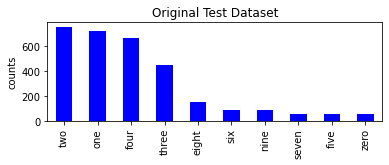

In [31]:
plt.subplot(212)
plt.title('Original Test Dataset')
plt.ylabel('counts')
XYtest_ran['Class'].value_counts().plot(kind="bar", color ="blue")

In [31]:
#generate this as a csv to directly feed into analyses on independent notebooks
XYtest_ran.to_csv('Test_Dataset.csv', index = False)

In [32]:
#drop the class column to fit 2304 into 48x48 matrix
XYtest.drop("Class",axis=1,inplace=True)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

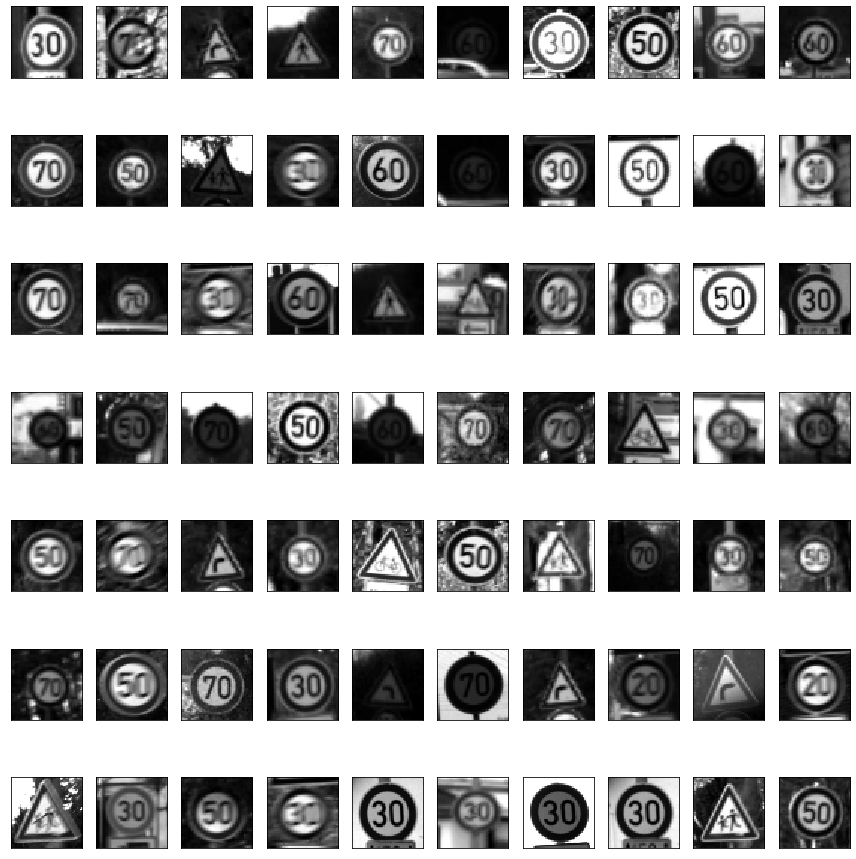

In [33]:
#review the test data 

plt.figure(figsize=(12,13))

for i in list(range(0,70)):
    plt.subplot(7,10,i+1)
    
    plt.imshow(XYtest.iloc[i].values.reshape(48,48), interpolation = "none", cmap = "gray")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
               
plt.tight_layout

In [32]:
#read the Cross validation file
Xran = pd.read_csv ('For_10_Fold_Cross_Validation.csv')

In [33]:
Xran.shape 
print(Xran)

          0      1      2      3      4      5      6      7      8      9  \
0      65.0   52.0   58.0   67.0   52.0   64.0   58.0   49.0   56.0   61.0   
1     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
2      35.0   35.0   35.0   34.0   34.0   35.0   36.0   38.0   42.0   44.0   
3      98.0   97.0   92.0   80.0   82.0   83.0   84.0   86.0   85.0   85.0   
4     255.0  255.0  255.0  255.0  251.0  225.0  232.0  252.0  247.0  254.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  166.0  100.0  107.0   95.0   94.0   65.0   82.0   87.0   86.0   86.0   
9686  213.0  237.0  239.0  241.0  184.0  103.0   86.0   75.0  116.0  156.0   
9687   14.0   14.0   14.0   14.0   14.0   14.0   14.0   14.0   14.0   15.0   
9688   18.0   18.0   19.0   19.0   19.0   19.0   19.0   19.0   19.0   19.0   
9689   32.0   54.0   68.0   79.0   80.0   79.0   62.0   42.0   35.0   35.0   

      ...   2295   2296   2297   2298   2299   2300  2301  2302

In [34]:
X4000 = Xran[:-5690]
X4000.shape
print(X4000)

          0      1      2      3      4      5      6      7      8      9  \
0      65.0   52.0   58.0   67.0   52.0   64.0   58.0   49.0   56.0   61.0   
1     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
2      35.0   35.0   35.0   34.0   34.0   35.0   36.0   38.0   42.0   44.0   
3      98.0   97.0   92.0   80.0   82.0   83.0   84.0   86.0   85.0   85.0   
4     255.0  255.0  255.0  255.0  251.0  225.0  232.0  252.0  247.0  254.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3995   39.0   44.0   43.0   46.0   50.0   49.0   51.0   52.0   47.0   43.0   
3996   48.0   57.0   53.0   59.0   76.0  122.0  208.0  241.0  246.0  247.0   
3997   17.0   18.0   18.0   19.0   19.0   17.0   16.0   16.0   19.0   20.0   
3998  255.0  142.0  101.0  101.0   98.0  100.0  100.0  101.0  100.0  100.0   
3999   32.0   33.0   33.0   32.0   30.0   33.0   33.0   34.0   36.0   38.0   

      ...   2295   2296   2297   2298   2299   2300   2301   23

In [35]:
Xrev = Xran.iloc[::-1]
print(Xrev)

          0      1      2      3      4      5      6      7      8      9  \
9689   32.0   54.0   68.0   79.0   80.0   79.0   62.0   42.0   35.0   35.0   
9688   18.0   18.0   19.0   19.0   19.0   19.0   19.0   19.0   19.0   19.0   
9687   14.0   14.0   14.0   14.0   14.0   14.0   14.0   14.0   14.0   15.0   
9686  213.0  237.0  239.0  241.0  184.0  103.0   86.0   75.0  116.0  156.0   
9685  166.0  100.0  107.0   95.0   94.0   65.0   82.0   87.0   86.0   86.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4     255.0  255.0  255.0  255.0  251.0  225.0  232.0  252.0  247.0  254.0   
3      98.0   97.0   92.0   80.0   82.0   83.0   84.0   86.0   85.0   85.0   
2      35.0   35.0   35.0   34.0   34.0   35.0   36.0   38.0   42.0   44.0   
1     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
0      65.0   52.0   58.0   67.0   52.0   64.0   58.0   49.0   56.0   61.0   

      ...   2295   2296   2297   2298   2299   2300  2301  2302

In [36]:
X5690Train = Xrev[:5690]
X5690Train.shape
print(X5690Train)

          0      1      2      3      4      5      6      7      8      9  \
9689   32.0   54.0   68.0   79.0   80.0   79.0   62.0   42.0   35.0   35.0   
9688   18.0   18.0   19.0   19.0   19.0   19.0   19.0   19.0   19.0   19.0   
9687   14.0   14.0   14.0   14.0   14.0   14.0   14.0   14.0   14.0   15.0   
9686  213.0  237.0  239.0  241.0  184.0  103.0   86.0   75.0  116.0  156.0   
9685  166.0  100.0  107.0   95.0   94.0   65.0   82.0   87.0   86.0   86.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4004   46.0   46.0   47.0   47.0   47.0   47.0   47.0   48.0   48.0   49.0   
4003   66.0   66.0   69.0   70.0   66.0   58.0   43.0   29.0   27.0   27.0   
4002  118.0  120.0  134.0  152.0  151.0  136.0  124.0  123.0  127.0  157.0   
4001   41.0   42.0   35.0   22.0   22.0   23.0   21.0   19.0   22.0   38.0   
4000  143.0  147.0  145.0  144.0  145.0  141.0  142.0  140.0  142.0  144.0   

      ...  2295  2296  2297   2298   2299   2300  2301  2302   

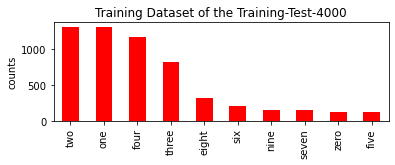

In [40]:
plt.subplot(212)
plt.title('Training Dataset of the Training-Test-4000')
plt.ylabel('counts')
X5690Train['Class'].value_counts().plot(kind="bar", color ="red")

In [41]:
Xtestran = pd.read_csv ('Test_Dataset.csv')
Xtestran.shape

(3090, 2305)

In [42]:
#join the two such that Y is the last column
Test4000 = pd.concat([Xtestran,X4000], axis=0)
#check the concatination
print(Test4000)
Test4000.head()


          0      1      2      3      4      5      6      7      8      9  \
0      22.0   23.0   24.0   24.0   24.0   22.0   20.0   24.0   25.0   26.0   
1     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
2     173.0  187.0  168.0  118.0   63.0  118.0  107.0  131.0  164.0  119.0   
3      52.0   52.0   54.0   57.0   59.0   60.0   61.0   58.0   57.0   56.0   
4     235.0  156.0  121.0   70.0   44.0   66.0   86.0   94.0  106.0  110.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3995   39.0   44.0   43.0   46.0   50.0   49.0   51.0   52.0   47.0   43.0   
3996   48.0   57.0   53.0   59.0   76.0  122.0  208.0  241.0  246.0  247.0   
3997   17.0   18.0   18.0   19.0   19.0   17.0   16.0   16.0   19.0   20.0   
3998  255.0  142.0  101.0  101.0   98.0  100.0  100.0  101.0  100.0  100.0   
3999   32.0   33.0   33.0   32.0   30.0   33.0   33.0   34.0   36.0   38.0   

      ...   2295   2296   2297   2298   2299   2300   2301   23

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,22.0,23.0,24.0,24.0,24.0,22.0,20.0,24.0,25.0,26.0,...,24.0,24.0,24.0,24.0,24.0,24.0,23.0,23.0,22.0,two
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,200.0,226.0,243.0,253.0,246.0,240.0,249.0,247.0,242.0,six
2,173.0,187.0,168.0,118.0,63.0,118.0,107.0,131.0,164.0,119.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,four
3,52.0,52.0,54.0,57.0,59.0,60.0,61.0,58.0,57.0,56.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,two
4,235.0,156.0,121.0,70.0,44.0,66.0,86.0,94.0,106.0,110.0,...,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,254.0,one


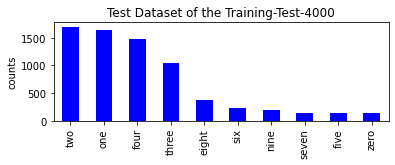

In [43]:
plt.subplot(212)
plt.title('Test Dataset of the Training-Test-4000')
plt.ylabel('counts')
Test4000['Class'].value_counts().plot(kind="bar", color ="blue")

In [70]:
#new Test dataset with additional 4000 instances from training dataset
Test4000.to_csv('Test_Dataset_4000.csv', index = False)

In [71]:
#new Test dataset with additional 4000 instances from training dataset
X5690Train.to_csv('Train_Dataset_4000.csv', index = False)

In [72]:
#confirm the dataset dimensions 
A = pd.read_csv ('Test_Dataset_4000.csv')
A.shape

(7090, 2305)

In [73]:
#confirm the dataset dimensions
B = pd.read_csv ('Train_Dataset_4000.csv')
B.shape

(5690, 2305)

In [44]:
# now rest of the steps are to create 9000 dataset
Xran = pd.read_csv ('For_10_Fold_Cross_Validation.csv')

In [45]:
X9000 = Xran[:-690]
X9000.shape


(9000, 2305)

In [46]:
Xrev2 = Xran.iloc[::-1]
print(Xrev2)

          0      1      2      3      4      5      6      7      8      9  \
9689   32.0   54.0   68.0   79.0   80.0   79.0   62.0   42.0   35.0   35.0   
9688   18.0   18.0   19.0   19.0   19.0   19.0   19.0   19.0   19.0   19.0   
9687   14.0   14.0   14.0   14.0   14.0   14.0   14.0   14.0   14.0   15.0   
9686  213.0  237.0  239.0  241.0  184.0  103.0   86.0   75.0  116.0  156.0   
9685  166.0  100.0  107.0   95.0   94.0   65.0   82.0   87.0   86.0   86.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4     255.0  255.0  255.0  255.0  251.0  225.0  232.0  252.0  247.0  254.0   
3      98.0   97.0   92.0   80.0   82.0   83.0   84.0   86.0   85.0   85.0   
2      35.0   35.0   35.0   34.0   34.0   35.0   36.0   38.0   42.0   44.0   
1     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
0      65.0   52.0   58.0   67.0   52.0   64.0   58.0   49.0   56.0   61.0   

      ...   2295   2296   2297   2298   2299   2300  2301  2302

In [47]:
X690Train = Xrev2[:690]
X690Train.shape


(690, 2305)

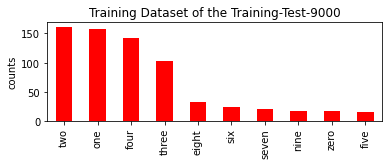

In [48]:
plt.subplot(212)
plt.title('Training Dataset of the Training-Test-9000')
plt.ylabel('counts')
X690Train['Class'].value_counts().plot(kind="bar", color ="red")

In [49]:
#join the two such that Y is the last column
Test9000 = pd.concat([Xtestran,X9000], axis=0)
#check the concatination
Test9000.shape


(12090, 2305)

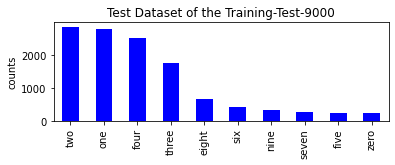

In [50]:
plt.subplot(212)
plt.title('Test Dataset of the Training-Test-9000')
plt.ylabel('counts')
Test9000['Class'].value_counts().plot(kind="bar", color ="blue")

In [79]:
X690Train.to_csv('Train_Dataset_9000.csv', index = False)

In [80]:
X9000.to_csv('Test_Dataset_9000.csv', index = False)

In [52]:
""" Read the cross validation dataset """
cross_val_data = pd.read_csv ('For_10_Fold_Cross_Validation.csv')

In [53]:
#create top 20 attributes from exploratory feature selection analyses

Top_20_Exploratory = cross_val_data[['792',
'742',
'747',
'741',
'697',
'698',
'1214',
'2068',
'1869',
'1119',
'648',
'1676',
'2111',
'1120',
'2067',
'2260',
'2162',
'2301',
'2212',
'2210',
                            '1168',
'1167',
'1120',
'1263',
'1073',
'1072',
'1121',
'1074',
'1310',
'599',
    '1314',
'1315',
'1316',
'1268',
'1264',
'1030',
'1364',
'981',
'982',
'1317',
'1269',
   '1265',
'1313',
'1312',
'1266',
'1217',
'1361',
'1218',
'1219',
'1170',
'1171',
'1220',
'1172',
       '983',
'1031',
'935',
'982',
'1030',
'934',
      '1509',
'1461',
'1462',
'1508',
'1460',
'745',
'746',
'1507',
'1459',
'1519',
'1471',
'1458',
'794',
'1792',
'1126',
'1793',
'1173',
'1842',
'1840',
'1843',
    '793',
'746',
'745',
'794',
'795',
'1264',
'1134',
'842',
'1086',
'1168',
'1085',
'1037',
'1135',
'843',
'1234',
    '1601',
'1663',
'1649',
'1600',
'1743',
'1648',
'1713',
'1714',
'1744',
'1518',
'1507',
'1695',
'1470',
'1519',
'1742',
'1760',
'1459',
'1506',
'1761',
'1517',
     '1695',
'1714',
'1173',
'1125',
'1713',
'1715',
'1666',
'1743',
'1762',
'1742',
'1667',
'1471',
     '1606',
'1558',
'1511',
'1462',
'1600',
'1601',
'1510',
'1649',
'1648',
'706',
'1505',
'707',
'1553',
'560',
'1506',
'1125',
'1647',
'1030',
'1172',
'2174',
  
                            'Class'
]]

In [54]:
Top_20_Exploratory.shape

(9690, 147)

In [55]:
#remove duplicates
Top_20_Exploratory_WithoutDuplicates = Top_20_Exploratory.loc[:,~Top_20_Exploratory.T.duplicated(keep='first')]
Top_20_Exploratory_WithoutDuplicates.shape

(9690, 120)

In [56]:
# randomize
Top_20_Exploratory_WithoutDuplicates_randomized = Top_20_Exploratory_WithoutDuplicates.sample(frac=1).reset_index(drop=True)


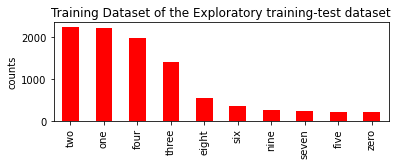

In [57]:
plt.subplot(212)
plt.title('Training Dataset of the Exploratory training-test dataset')
plt.ylabel('counts')
Top_20_Exploratory_WithoutDuplicates_randomized['Class'].value_counts().plot(kind="bar", color ="red")

In [14]:
# save dataframe as csv for further analyses
Top_20_Exploratory_WithoutDuplicates_randomized.to_csv('Top_20_Exploratory_random.csv', index = False)

In [58]:
""" Read the test dataset """
Test = pd.read_csv ('Test_Dataset.csv')

In [59]:
#create top 20 attributes from exploratory feature selection analyses

Test_Exploratory = Test[['792',
'742',
'747',
'741',
'697',
'698',
'1214',
'2068',
'1869',
'1119',
'648',
'1676',
'2111',
'1120',
'2067',
'2260',
'2162',
'2301',
'2212',
'2210',
                            '1168',
'1167',
'1120',
'1263',
'1073',
'1072',
'1121',
'1074',
'1310',
'599',
    '1314',
'1315',
'1316',
'1268',
'1264',
'1030',
'1364',
'981',
'982',
'1317',
'1269',
   '1265',
'1313',
'1312',
'1266',
'1217',
'1361',
'1218',
'1219',
'1170',
'1171',
'1220',
'1172',
       '983',
'1031',
'935',
'982',
'1030',
'934',
      '1509',
'1461',
'1462',
'1508',
'1460',
'745',
'746',
'1507',
'1459',
'1519',
'1471',
'1458',
'794',
'1792',
'1126',
'1793',
'1173',
'1842',
'1840',
'1843',
    '793',
'746',
'745',
'794',
'795',
'1264',
'1134',
'842',
'1086',
'1168',
'1085',
'1037',
'1135',
'843',
'1234',
    '1601',
'1663',
'1649',
'1600',
'1743',
'1648',
'1713',
'1714',
'1744',
'1518',
'1507',
'1695',
'1470',
'1519',
'1742',
'1760',
'1459',
'1506',
'1761',
'1517',
     '1695',
'1714',
'1173',
'1125',
'1713',
'1715',
'1666',
'1743',
'1762',
'1742',
'1667',
'1471',
     '1606',
'1558',
'1511',
'1462',
'1600',
'1601',
'1510',
'1649',
'1648',
'706',
'1505',
'707',
'1553',
'560',
'1506',
'1125',
'1647',
'1030',
'1172',
'2174',
  
                            'Class'
]]

In [60]:
Test_Exploratory.shape

(3090, 147)

In [61]:
#remove duplicates
Test_Exploratory_WithoutDuplicates = Test_Exploratory.loc[:,~Test_Exploratory.T.duplicated(keep='first')]
Test_Exploratory_WithoutDuplicates.shape

(3090, 120)

In [62]:
# randomize
Test_Exploratory_WithoutDuplicates_randomized = Test_Exploratory_WithoutDuplicates.sample(frac=1).reset_index(drop=True)

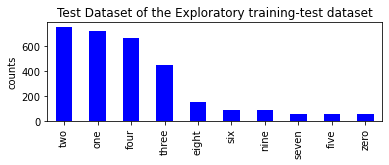

In [63]:
plt.subplot(212)
plt.title('Test Dataset of the Exploratory training-test dataset')
plt.ylabel('counts')
Test_Exploratory_WithoutDuplicates['Class'].value_counts().plot(kind="bar", color ="blue")

In [21]:
# save dataframe as csv for further analyses
Test_Exploratory_WithoutDuplicates_randomized.to_csv('Test_Exploratory_random.csv', index = False)